In [1]:
import pandas as pd

df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
df_wine.columns = ['Class', 'Alcohol', 'Malic acid','Ash','Alcalinity of ash','Magnesium','Total phenols',
                   'Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity',
                   'Hue','OD280/OD315 of diluted wines','Proline']
df_wine.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [2]:
from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:,1:].values, df_wine.iloc[:,0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.3)

In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)
print("X_tain_std.shape: {}".format(X_train_std.shape))

X_tain_std.shape: (124, 13)


In [4]:
import numpy as np

cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print("Eigentwerte: \n%s" % eigen_vals)

Eigentwerte: 
[ 4.8923083   2.46635032  1.42809973  1.01233462  0.84906459  0.60181514
  0.52251546  0.08414846  0.33051429  0.29595018  0.16831254  0.21432212
  0.2399553 ]


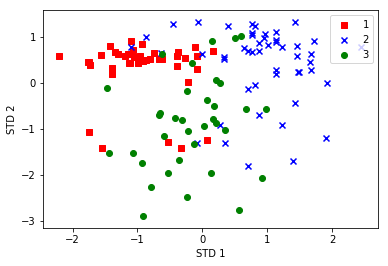

In [5]:
import matplotlib.pyplot as plt
% matplotlib inline
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_std[y_train==l, 0] * (-1),
               X_train_std[y_train==l, 1] * (-1),
               c=c, label=l, marker=m)
plt.xlabel('STD 1')
plt.ylabel('STD 2')
plt.legend(loc='upper right')

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
print("X_test_pca.shape: {}".format(X_test_pca.shape))

X_test_pca.shape: (54, 2)


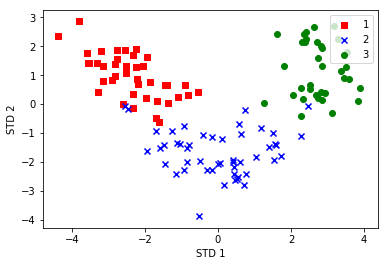

In [7]:
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train==l, 0] * (-1),
               X_train_pca[y_train==l, 1] * (-1),
               c=c, label=l, marker=m)
plt.xlabel('STD 1')
plt.ylabel('STD 2')
plt.legend(loc='upper right')

In [13]:
print("Abmessungen der Hauptkomponente: {}".format(pca.components_.shape))
print("Hauptkomponenten:\n{}".format(pca.components_))

Abmessungen der Hauptkomponente: (2, 13)
Hauptkomponenten:
[[ 0.14669811 -0.24224554 -0.02993442 -0.25519002  0.12079772  0.38934455
   0.42326486 -0.30634956  0.30572219 -0.09869191  0.30032535  0.36821154
   0.29259713]
 [-0.50417079 -0.24216889 -0.28698484  0.06468718 -0.22995385 -0.09363991
  -0.01088622 -0.01870216 -0.03040352 -0.54527081  0.27924322  0.174365
  -0.36315461]]


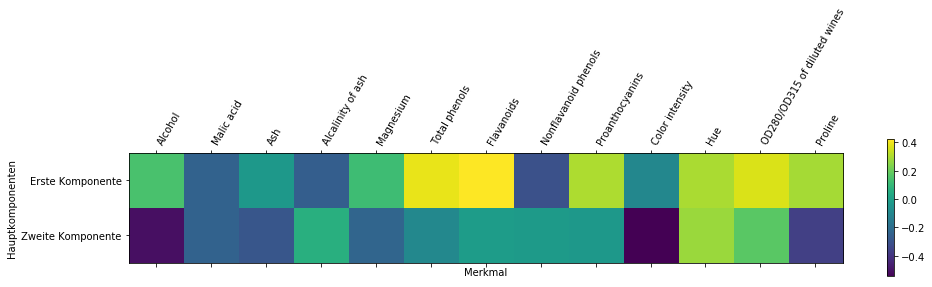

In [17]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0,1], ["Erste Komponente", "Zweite Komponente"])
plt.colorbar()
plt.xticks(range(len(df_wine.columns[1:])),
          df_wine.columns[1:], rotation=60, ha="left")
plt.xlabel("Merkmal")
plt.ylabel("Hauptkomponenten")